# 7. Reconstruct mitohondrial phylogeny

In [ ]:
smpl2ref = {
    'MentL30'    :['NC_024097.1',15],
    'MareHarA'   :['NC_026554.1',4],
    'MjavVW4'    :['NC_026556.1',1],
    'MjavVW5'    :['NC_026556.1',1],
    'MareL28'    :['NC_026554.1',1],
    'MincA14'    :['NC_024097.1',1],
    'MjavLD17'   :['NC_026556.1',1],
    'MincL27'    :['NC_024097.1',1],
    'MjavLD15'   :['NC_026556.1',1],
    'MjavL57'    :['NC_026556.1',1],
    'MincVW6'    :['NC_024097.1',1],
    'MincL9'     :['NC_024097.1',1],
    'Minc557R'   :['NC_024097.1',1],
    'MincL19'    :['NC_024097.1',1],
    'MareL32'    :['NC_026554.1',4],
    'MincHarC'   :['NC_024097.1',1],
    'MfloSJF1'   :['NC_024097.1',15],
    'MfloJB5'    :['NC_024097.1',6],
    'MlanSJH1'   :['NC_024097.1',6]    
}

In [43]:
from reprophylo import *

In [93]:
makedir('mitochondrial_assemblies/phylogenetic_analysis')

misc.py:291: UserWarning: keeping existing fpath mitochondrial_assemblies/phylogenetic_analysis
  warnings.warn('keeping existing fpath %s'%name)


## 7.1 Write loci file for ReproPhylo

In [94]:
%%file mitochondrial_assemblies/phylogenetic_analysis/loci.csv
dna,CDS,COX1,COX1
dna,rRNA,s-rRNA,s-rRNA
dna,CDS,ND1,ND1
dna,CDS,ND2,ND2
dna,CDS,COX3,COX3
dna,CDS,ND6,ND6
dna,CDS,ND4L,ND4L
dna,CDS,COX2,COX2
dna,rRNA,l-rRNA,l-rRNA
dna,CDS,ND3,ND3
dna,CDS,CYTB,CYTB
dna,CDS,ND4,ND4
dna,rRNA,control_region,control_region
dna,CDS,ATP6,ATP6
dna,CDS,ND5,ND5

Overwriting mitochondrial_assemblies/phylogenetic_analysis/loci.csv


## 7.2 Start a Project with outgroups

In [7]:
from reprophylodev import *
pj = Project('mitochondrial_assemblies/phylogenetic_analysis/loci.csv',
             pickle='mitochondrial_assemblies/phylogenetic_analysis/mito.pjpkl',
             git=False)

# read the sequence data
infiles = list(glob.glob('mitochondrial_assemblies/*_genes.fasta'))

pj.read_denovo(infiles, 'dna')

# Annotate the sequences
cds_loci = ['COX1','ND1','ND2','COX3','ND6','ND4L',
            'COX2','ND3','CYTB','ND4','ATP6','ND5']

for r in pj.records:
    orig_id = r.features[0].qualifiers['original_id'][0]
    organism, gene = orig_id.split('_')[0], orig_id.split('_')[-1]
    if 'region' in orig_id:
        gene = 'control_region'
    if gene in cds_loci:
        pj.add_feature_to_record(r.id, 'CDS', qualifiers={'gene':gene,
                                                         'organism': organism,
                                                         'codon_start': 1,
                                                         'transl_table': 5})
    else:
        pj.add_feature_to_record(r.id, 'rRNA', qualifiers={'gene':gene,
                                                         'organism': organism})

for r in pj.records:
    for f in r.features:
        if 'translation' in f.qualifiers:
            f.qualifiers['translation'][0] = f.qualifiers['translation'][0].replace('*','X')

### 7.2.1 Occupancy table with outgroup

In [10]:
pj.extract_by_locus()
pj.copy_paste_from_features_to_source('organism','organism')

import pandas as pd

pj.species_vs_loci('mitochondrial_assemblies/phylogenetic_analysis/occup.csv')

df=pd.read_table('mitochondrial_assemblies/phylogenetic_analysis/occup.csv')
df


species  control_region  COX2  COX3  CYTB  COX1  ATP6  l-rRNA  ND4L  \
0          557R               1     1     1     1     1     1       1     1   
1          HarA               1     1     1     1     1     1       1     1   
2          HarC               1     1     1     1     1     1       1     1   
3       MareL28               1     1     1     1     1     1       1     1   
4       MareL32               1     1     1     1     1     1       1     1   
5       MentL30               1     1     1     1     1     1       1     0   
6          Mflo               1     1     1     1     1     1       1     1   
7   MfloFloSoum               1     1     1     1     1     1       1     1   
8       MincA14               1     1     1     1     1     1       1     1   
9       MincL15               1     1     1     1     1     1       1     1   
10      MincL17               1     1     1     1     1     1       1     1   
11      MincL19               1     1     1     1     1     1       1     1   
12      MincL27               1     1     1     1     1     1       1     1   
13       MincL9               1     1     1     1     1     1       1     1   
14      MincVW6               1     1     1     1     1     1       1     1   
15      MjavL57               1     1     1     1     1     1       1     1   
16      MjavVW4               1     1     1     1     1     1       1     1   
17      MjavVW5               1     1     1     1     1     1       1     1   
18  MlanHapSoum               1     1     1     1     1     1       1     1   

    s-rRNA  ND1  ND3  ND2  ND5  ND4  ND6  
0        1    1    1    1    1    1    1  
1        1    1    1    1    1    1    1  
2        1    1    1    1    1    1    1  
3        1    1    1    1    1    1    1  
4        1    1    1    1    1    1    1  
5        1    1    1    1    1    1    1  
6        1    1    1    1    1    1    1  
7        1    1    1    1    1    1    1  
8        1    1    1    1    1    1    1  
9        1    1    1    1    1    1    1  
10       1    1    1    1    1    1    1  
11       1    1    1    1    1    1    1  
12       1    1    1    1    1    1    1  
13       1    1    1    1    1    1    1  
14       1    1    1    1    1    1    1  
15       1    1    1    1    1    1    1  
16       1    1    1    1    1    1    1  
17       1    1    1    1    1    1    1  
18       1    1    1    1    1    1    1

### 7.2.2 Alignment
#### 7.2.2.1 Run the alignment

In [11]:
pj.align([AlnConf(pj, method_name='linsi',CDSAlign=False,
                  cline_args={'--localpair':True, '--maxiterate': 1000})])

mafft --localpair --maxiterate 1000 403801466594724.93_control_region.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_COX2.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_COX3.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_CYTB.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_COX1.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ATP6.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_l-rRNA.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ND4L.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_s-rRNA.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ND1.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ND3.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ND2.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ND5.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ND4.fasta
mafft --localpair --maxiterate 1000 403801466594724.93_ND6.fasta


#### 7.2.2.2 Write alignment files

In [12]:
fs = pj.write_alns(id=['organism'])
from os import rename

for f in fs:
    path,sep,fname = f.rpartition('/')
    new_f = path+'./mitochondrial_assemblies/phylogenetic_analysis/'+fname
    print new_f
    rename(f, new_f)

./mitochondrial_assemblies/phylogenetic_analysis/ND2@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/COX3@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/control_region@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/COX2@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/l-rRNA@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ATP6@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND1@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/COX1@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND3@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/s-rRNA@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND5@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND6@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND4L@linsi_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND4@linsi_aln.fasta
./mitochondr

### 7.2.3 Trim the alignment
#### 7.2.3.1 Run trimAl

In [13]:
pj.trim([TrimalConf(pj, method_name='gt9',trimal_commands={'gt':0.9})])

trimal -in 948821466594756.42_ND2@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_COX3@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_control_region@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_COX2@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_l-rRNA@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_ATP6@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_ND1@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_COX1@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_ND3@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_s-rRNA@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_ND5@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_ND6@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_ND4L@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_ND4@linsi.fasta -gt 0.9
trimal -in 948821466594756.42_CYTB@linsi.fasta -gt 0.9


#### 7.2.3.2 Write alignment files

In [16]:
fs = pj.write_trimmed_alns(id=['organism'])
from os import rename

for f in fs:
    path,sep,fname = f.rpartition('/')
    new_f = path+'./mitochondrial_assemblies/phylogenetic_analysis/'+fname
    print new_f
    rename(f, new_f)

./mitochondrial_assemblies/phylogenetic_analysis/ND4@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND1@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND6@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/full_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/s-rRNA@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/control_region@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ATP6@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/COX1@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND5@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/COX2@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/CYTB@linsi@gt9_trimmed_aln.fasta
./mitochondrial_assemblies/phylogenetic_analysis/ND2@linsi@gt9_trimmed_aln.fasta
./mitochondrial_ass

### 7.2.4 Build supermatrix with outgroup

In [15]:
c = Concatenation('full',pj.loci, 'organism')

pj.add_concatenation(c)
pj.make_concatenation_alignments()

Concatenation full will have the following data
OTU                           control_region      COX2                COX3                CYTB                COX1                ATP6                l-rRNA              ND4L                s-rRNA              ND1                 ND3                 ND2                 ND5                 ND4                 ND6                 
MincL27                       denovo102_f0   denovo97_f0    denovo94_f0    denovo100_f0   denovo90_f0    denovo103_f0   denovo98_f0    denovo96_f0    denovo91_f0    denovo92_f0    denovo99_f0    denovo93_f0    denovo104_f0   denovo101_f0   denovo95_f0    
MincL15                       denovo281_f0   denovo276_f0   denovo273_f0   denovo279_f0   denovo269_f0   denovo282_f0   denovo277_f0   denovo275_f0   denovo270_f0   denovo271_f0   denovo278_f0   denovo272_f0   denovo283_f0   denovo280_f0   denovo274_f0   
Mflo                          denovo251_f0   denovo246_f0   denovo243_f0   denovo249_f0   denovo239_f0   deno

In [14]:
pj.concatenations = []

### 7.2.5 Build tree with outgroup
#### 7.2.5.1 Prepare the files

In [36]:
rax = RaxmlConf(pj,
               preset='fd',
               method_name='fd',
               alns=['full'],
               model='GAMMA',
               threads=10,
               cmd='raxmlHPC-PTHREADS-AVX',
               cline_args={'-N': 100})

raxmlHPC-PTHREADS-AVX -f d -m PROTGAMMAJTT -n 907081466595204.76_full0 -q 907081466595204.76_full_partfile -p 748 -s 907081466595204.76_full.fasta -T 10 -N 100


#### 7.2.5.2 Run raxml and draw the tree

returning tree object full@mixed@mixed@fd


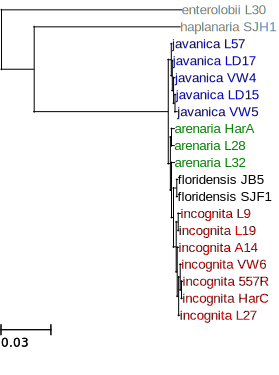

In [126]:
pj.tree([rax])

t=pj.ft('full')
t.dist=0
t.set_outgroup('MentL30')
ts = TreeStyle()
ts.show_leaf_name = False

inc_hap_anc = t.get_common_ancestor('MlanHapSoum','MjavVW4')
total_dist_to_ent = t.get_distance(inc_hap_anc) +\
                    t.get_distance('MentL30')
inc_hap_anc.dist = 0.15*total_dist_to_ent
(t&'MentL30').dist = 0.85*total_dist_to_ent

# The keys in the last iteration are the old ones
# so this will only work from the next run
                                        # old label, in 907081466595204:
labels = {'Minc557R': 'incognita 557R', # 557R
          'MincVW6': 'incognita VW6',
          'MincHarC': 'incognita HarC', # HarC
          'MincL27': 'incognita L27',
          'MincA14': 'incognita A14',
          'MincL9': 'incognita L9',
          'MincL19': 'incognita L19',
          'MfloSJF1': 'floridensis SJF1', # MfloFloSoum
          'MfloJB5': 'floridensis JB5',   # Mflo
          'MareL32': 'arenaria L32',
          'MareHarA': 'arenaria HarA',    # HarA
          'MareL28': 'arenaria L28',
          'MjavVW4': 'javanica VW4',
          'MjavVW5': 'javanica VW5',
          'MjavLD15': 'javanica LD15',    # MincL15
          'MjavLD17': 'javanica LD17',    # MincL17
          'MjavL57': 'javanica L57',
          'MentL30': 'enterolobii L30',
          'MlanSJH1': 'haplanaria SJH1'}  #MlanHapSoum

colors = {'incognita': 'red',
          'javanica': 'blue',
          'arenaria': 'green',
          'floridensis': 'black',
          'enterolobii': 'gray',
          'haplanaria': 'gray'}

for l in t:
    sp = labels[l.name].split()[0]
    color = colors[sp]
    textface = TextFace(labels[l.name],
                        fsize=10,
                        fgcolor=color,
                        ftype='Arial')
    l.add_face(textface,0,position='branch-right')
    
ns = NodeStyle()
ns['size'] = 0
ns['vt_line_width'] = 1
ns['hz_line_width'] = 1

for n in t.traverse():
    if not n.is_leaf():
        if n.support > 80:
            n.add_face(CircleFace(2,'black'),0,position='float')
    n.set_style(node_style=ns)

t.render("mitochondrial_assemblies/phylogenetic_analysis/full.png",
         w=5000,
         dpi=600,
         tree_style=ts)

t.render("%%inline", tree_style=ts)

## 7.3 Build a tree without outgroup
### 7.3.1 Start a project and make occupancy table

In [48]:
p_no_og = Project('mitochondrial_assemblies/phylogenetic_analysis/loci.csv',
                   pickle='mitochondrial_assemblies/phylogenetic_analysis/mito_no_og.pjpkl',
                   git=False)

exclude = ['MlanHapSoum','MentL30']
infiles_no_og = [f for f
                 in list(glob.glob('mitochondrial_assemblies/*_genes.fasta'))
                 if not any([e in f for e in exclude])]

p_no_og.read_denovo(infiles_no_og, 'dna')

cds_loci = ['COX1','ND1','ND2','COX3','ND6','ND4L',
            'COX2','ND3','CYTB','ND4','ATP6','ND5']


for r in p_no_og.records:
    orig_id = r.features[0].qualifiers['original_id'][0]
    organism, gene = orig_id.split('_')[0], orig_id.split('_')[-1]
    if 'region' in orig_id:
        gene = 'control_region'
    if gene in cds_loci:
        p_no_og.add_feature_to_record(r.id, 'CDS', qualifiers={'gene':gene,
                                                         'organism': organism,
                                                         'codon_start': 1,
                                                         'transl_table': 5})
    else:
        p_no_og.add_feature_to_record(r.id, 'rRNA', qualifiers={'gene':gene,
                                                         'organism': organism})

for r in p_no_og.records:
    for f in r.features:
        if 'translation' in f.qualifiers:
            f.qualifiers['translation'][0] = f.qualifiers['translation'][0].replace('*','X')        

p_no_og.extract_by_locus()
p_no_og.copy_paste_from_features_to_source('organism','organism')

import pandas as pd

p_no_og.species_vs_loci('mitochondrial_assemblies/phylogenetic_analysis/occup.csv')

df=pd.read_table('mitochondrial_assemblies/phylogenetic_analysis/occup.csv')
df

species  control_region  COX2  COX3  CYTB  COX1  ATP6  l-rRNA  ND4L  \
0          557R               1     1     1     1     1     1       1     1   
1          HarA               1     1     1     1     1     1       1     1   
2          HarC               1     1     1     1     1     1       1     1   
3       MareL28               1     1     1     1     1     1       1     1   
4       MareL32               1     1     1     1     1     1       1     1   
5          Mflo               1     1     1     1     1     1       1     1   
6   MfloFloSoum               1     1     1     1     1     1       1     1   
7       MincA14               1     1     1     1     1     1       1     1   
8       MincL15               1     1     1     1     1     1       1     1   
9       MincL17               1     1     1     1     1     1       1     1   
10      MincL19               1     1     1     1     1     1       1     1   
11      MincL27               1     1     1     1     1     1       1     1   
12       MincL9               1     1     1     1     1     1       1     1   
13      MincVW6               1     1     1     1     1     1       1     1   
14      MjavL57               1     1     1     1     1     1       1     1   
15      MjavVW4               1     1     1     1     1     1       1     1   
16      MjavVW5               1     1     1     1     1     1       1     1   

    s-rRNA  ND1  ND3  ND2  ND5  ND4  ND6  
0        1    1    1    1    1    1    1  
1        1    1    1    1    1    1    1  
2        1    1    1    1    1    1    1  
3        1    1    1    1    1    1    1  
4        1    1    1    1    1    1    1  
5        1    1    1    1    1    1    1  
6        1    1    1    1    1    1    1  
7        1    1    1    1    1    1    1  
8        1    1    1    1    1    1    1  
9        1    1    1    1    1    1    1  
10       1    1    1    1    1    1    1  
11       1    1    1    1    1    1    1  
12       1    1    1    1    1    1    1  
13       1    1    1    1    1    1    1  
14       1    1    1    1    1    1    1  
15       1    1    1    1    1    1    1  
16       1    1    1    1    1    1    1

### 7.3.2 Align and trim

In [52]:
p_no_og.align([AlnConf(p_no_og,
                        method_name='linsi',
                        CDSAlign=False,
                        cline_args={'--localpair':True,
                                    '--maxiterate': 1000})])

p_no_og.trim([TrimalConf(p_no_og,
                          method_name='gt9',
                          trimal_commands={'gt':0.9})])

mafft --localpair --maxiterate 1000 774201466596752.67_control_region.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_COX2.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_COX3.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_CYTB.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_COX1.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ATP6.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_l-rRNA.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ND4L.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_s-rRNA.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ND1.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ND3.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ND2.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ND5.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ND4.fasta
mafft --localpair --maxiterate 1000 774201466596752.67_ND6.fasta
Al

### 7.3.3 Build supermatrix without outgroup

In [55]:
p_no_og.concatenations = []

locs = [l for l in p_no_og.loci if not l.name in ['COX2','ND4L','ND3']]
c = Concatenation('no_og',locs, 'organism')
p_no_og.add_concatenation(c)
p_no_og.make_concatenation_alignments()

Concatenation no_og will have the following data
OTU                           control_region      COX3                CYTB                COX1                ATP6                l-rRNA              s-rRNA              ND1                 ND2                 ND5                 ND4                 ND6                 
MincL27                       denovo102_f0   denovo94_f0    denovo100_f0   denovo90_f0    denovo103_f0   denovo98_f0    denovo91_f0    denovo92_f0    denovo93_f0    denovo104_f0   denovo101_f0   denovo95_f0    
MincL15                       denovo252_f0   denovo244_f0   denovo250_f0   denovo240_f0   denovo253_f0   denovo248_f0   denovo241_f0   denovo242_f0   denovo243_f0   denovo254_f0   denovo251_f0   denovo245_f0   
Mflo                          denovo222_f0   denovo214_f0   denovo220_f0   denovo210_f0   denovo223_f0   denovo218_f0   denovo211_f0   denovo212_f0   denovo213_f0   denovo224_f0   denovo221_f0   denovo215_f0   
MincL17                       denovo72_f0    de

### 7.3.4 Make raxml input files

In [ ]:
rax = RaxmlConf(p_no_og,
                   preset='fd_b_fb',
                   method_name='fd_b_fb',
                   alns=['no_og'],
                   model='GAMMA',
                   threads=12,
                   cmd = 'raxmlHPC-PTHREADS-SSE3',
                   cline_args={'-N': 100})

### 7.3.5 Run RAxML

In [ ]:
!raxmlHPC-PTHREADS-SSE3 -f d -m GTRCAT --HKY85 -V \
-n 217021466596864.82_no_og0 \
-q 217021466596864.82_no_og_partfile -p 888 \
-s 217021466596864.82_no_og.fasta \
-T 12 -N 100
!raxmlHPC-PTHREADS-SSE3 -b 812 -m GTRCAT --HKY85 -V \
-n 217021466596864.82_no_og1 \
-q 217021466596864.82_no_og_partfile -p 980 \
-s 217021466596864.82_no_og.fasta \
-T 12 -N 100
!raxmlHPC-PTHREADS-SSE3 -f b -m GTRCAT --HKY85 -V \
-n 217021466596864.82_no_og2 \
-q 217021466596864.82_no_og_partfile -p 714 \
-s 217021466596864.82_no_og.fasta \
-t RAxML_bestTree.217021466596864.82_no_og0 \
-T 12 -z RAxML_bootstrap.217021466596864.82_no_og1

### 7.3.6 Draw the tree

In [ ]:
t = Tree('./mitochondrial_assemblies/phylogenetic_analysis/RAxML_bipartitions.217021466596864.82_no_og2') #GTRCAT --HKY85 -V

t.dist = 0
t.set_outgroup(t.get_midpoint_outgroup())
ts = TreeStyle()
ts.mode = 'c'
ts.show_leaf_name = False

# The keys in the last iteration are the old ones
# so this will only work from the next run
                                        # old label, in 21702146659:
labels = {'Minc557R': 'incognita 557R', # 557R
          'MincVW6': 'incognita VW6',
          'MincHarC': 'incognita HarC', # HarC
          'MincL27': 'incognita L27',
          'MincA14': 'incognita A14',
          'MincL9': 'incognita L9',
          'MincL19': 'incognita L19',
          'MfloSJF1': 'floridensis SJF1', # MfloFloSoum
          'MfloJB5': 'floridensis JB5',   # Mflo
          'MareL32': 'arenaria L32',
          'MareHarA': 'arenaria HarA',    # HarA
          'MareL28': 'arenaria L28',
          'MjavVW4': 'javanica VW4',
          'MjavVW5': 'javanica VW5',
          'MjavLD15': 'javanica LD15',    # MincL15
          'MjavLD17': 'javanica LD17',    # MincL17
          'MjavL57': 'javanica L57',
          'MentL30': 'enterolobii L30',
          'MlanSJH1': 'haplanaria SJH1'}  #MlanHapSoum

colors = {'incognita': 'red',
          'javanica': 'blue',
          'arenaria': 'green',
          'floridensis': 'black'}

for l in t:
    sp = labels[l.name].split()[0]
    color = colors[sp]
    textface = TextFace(labels[l.name],
                        fsize=10,
                        fgcolor=color,
                        ftype='Arial')
    l.add_face(textface,0,position='branch-right')
    
ns = NodeStyle()
ns['size'] = 0
ns['vt_line_width'] = 1
ns['hz_line_width'] = 1

for n in t.traverse():
    if not n.is_leaf():
        if n.support > 80:
            n.add_face(CircleFace(2,'black'),0,position='float')
    n.set_style(node_style=ns)

t.render("mitochondrial_assemblies/phylogenetic_analysis/no_og.png",
         w=10000,
         dpi=600,
         tree_style=ts)

t.render("%%inline", tree_style=ts)

In [3]:
from IPython.display import  Image
Image('mitochondrial_assemblies/phylogenetic_analysis/mito.png')